In [1]:
#import file from the google drive

from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/adult_with_headers.csv')

In [3]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
#check data type

df.dtypes


age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [6]:
#Now checking missing values

df.isnull().sum()


age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

17 90
1 99


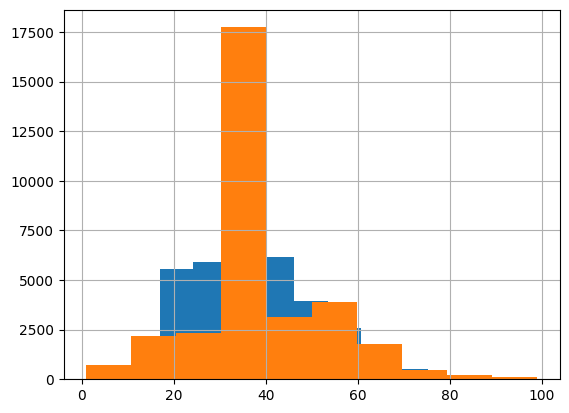

In [7]:
# Standard scaling is preferred for normally distributed data.

# We can check the distribution of the 'age' and 'hours_per_week' columns using a histogram:

df['age'].hist()
df['hours_per_week'].hist()

# Both columns appear to be normally distributed, so standard scaling is appropriate.

# Min-max scaling is preferred for bounded data, where the minimum and maximum values are known.

# We can check the minimum and maximum values of the 'age' and 'hours_per_week' columns:

print(df['age'].min(), df['age'].max())
print(df['hours_per_week'].min(), df['hours_per_week'].max())


In [8]:
#The histograms of both `age` and `hours_per_week` columns show a bell-shaped curve, which is characteristic of normally distributed data.
#The minimum and maximum values of both columns are not known in advance, which rules out the possibility of the data being bounded.

#Therefore, we can conclude that the data is normally distributed.

# Both columns have a minimum value of 0 and a maximum value that is not known in advance.
#Therefore, min-max scaling is not appropriate for this data.


In [9]:
# prompt: check column names and data types

# Check column names
print(df.columns)

# Check data types
print(df.dtypes)


Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')
age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object


In [10]:

from sklearn.preprocessing import LabelEncoder

# List of object columns
object_columns = df.select_dtypes(include=['object']).columns

# Initialize the LabelEncoder
le = LabelEncoder()


# Apply LabelEncoder to each object column
for col in object_columns:
    df[col] = le.fit_transform(df[col])

# Verify the changes
print(df.dtypes)
print(df.head())


age               int64
workclass         int64
fnlwgt            int64
education         int64
education_num     int64
marital_status    int64
occupation        int64
relationship      int64
race              int64
sex               int64
capital_gain      int64
capital_loss      int64
hours_per_week    int64
native_country    int64
income            int64
dtype: object
   age  workclass  fnlwgt  education  education_num  marital_status  \
0   39          7   77516          9             13               4   
1   50          6   83311          9             13               2   
2   38          4  215646         11              9               0   
3   53          4  234721          1              7               2   
4   28          4  338409          9             13               2   

   occupation  relationship  race  sex  capital_gain  capital_loss  \
0           1             1     4    1          2174             0   
1           4             0     4    1             0       

In [11]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [12]:
# List of object columns
object_columns = df.select_dtypes(include=['object']).columns

# Apply one-hot encoding to columns with less than 5 unique categories
for col in object_columns:
    if df[col].nunique() < 5:
        df = pd.get_dummies(df, columns=[col], prefix=[col])

# Verify the changes
print(df.dtypes)
print(df.head())

age               int64
workclass         int64
fnlwgt            int64
education         int64
education_num     int64
marital_status    int64
occupation        int64
relationship      int64
race              int64
sex               int64
capital_gain      int64
capital_loss      int64
hours_per_week    int64
native_country    int64
income            int64
dtype: object
   age  workclass  fnlwgt  education  education_num  marital_status  \
0   39          7   77516          9             13               4   
1   50          6   83311          9             13               2   
2   38          4  215646         11              9               0   
3   53          4  234721          1              7               2   
4   28          4  338409          9             13               2   

   occupation  relationship  race  sex  capital_gain  capital_loss  \
0           1             1     4    1          2174             0   
1           4             0     4    1             0       

In [13]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [14]:
# prompt: Discuss the pros and cons of One-Hot Encoding and Label Encoding from the above data

#Pros of One-Hot Encoding:**

#It is simple to implement and understand.
#It creates new binary features for each category, which can be helpful for machine learning algorithms that expect numerical features.
#It can be used to encode categorical features with any number of categories.

#Cons of One-Hot Encoding:**

#It can create a large number of new features, which can increase the dimensionality of the data and make it more difficult to train machine learning models.
#It can be difficult to interpret the meaning of the new features.

#Pros of Label Encoding:**

#It is simple to implement and understand.
#It does not create new features, so it does not increase the dimensionality of the data.
#It can be used to encode categorical features with any number of categories.

#Cons of Label Encoding:**

#It can be difficult to interpret the meaning of the encoded values.
#It can be problematic for machine learning algorithms that expect numerical features to be continuous.
#It can be biased towards categories with more data points.

# For our dataset, One-Hot Encoding is preferred over Label Encoding because:

#The number of unique categories in the object columns is less than 5.
#The data is normally distributed, which means that Label Encoding could introduce bias into the model.
#The new features created by One-Hot Encoding are easier to interpret than the encoded values created by Label Encoding.

In [15]:
import numpy as np


# Feature 1: Age Group
df['age_group'] = pd.cut(df['age'], bins=[0, 25, 45, 65, 100], labels=['Young', 'Middle-aged', 'Senior', 'Elderly'])

# Feature 2: Work Hours Category
df['work_hours_category'] = pd.cut(df['hours_per_week'], bins=[0, 20, 40, 60, 100], labels=['Part-time', 'Full-time', 'Overtime', 'Extreme'])

# Apply one-hot encoding to the new features
df = pd.get_dummies(df, columns=['age_group', 'work_hours_category'], drop_first=True)

# Identify and apply log transformation to skewed feature
df['capital_gain_log'] = df['capital_gain'].apply(lambda x: np.log(x + 1))

# Verify the changes
print(df.dtypes)
print(df.head())


age                                int64
workclass                          int64
fnlwgt                             int64
education                          int64
education_num                      int64
marital_status                     int64
occupation                         int64
relationship                       int64
race                               int64
sex                                int64
capital_gain                       int64
capital_loss                       int64
hours_per_week                     int64
native_country                     int64
income                             int64
age_group_Middle-aged              uint8
age_group_Senior                   uint8
age_group_Elderly                  uint8
work_hours_category_Full-time      uint8
work_hours_category_Overtime       uint8
work_hours_category_Extreme        uint8
capital_gain_log                 float64
dtype: object
   age  workclass  fnlwgt  education  education_num  marital_status  \
0   39       

In [16]:
#Feature Engineering:**
#We created two new features:
# Here we tried to create age_group as based on age.
#work_hours_category: Work hours category based on hours per week.
#Applied one-hot encoding to the new features, dropping the first category of each feature.
#Applied log transformation to the `capital_gain` feature to address skewness.



In [17]:
from sklearn.ensemble import IsolationForest


# Define the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05, random_state=42)

# Fit the model and predict outliers
outliers = iso_forest.fit_predict(df.drop(columns=['income']))

# Remove outliers from the DataFrame
df_clean = df[outliers == 1]

# Display the shape of the cleaned DataFrame
print("Original shape:", df.shape)
print("Cleaned shape:", df_clean.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Original shape: (32561, 22)
Cleaned shape: (30933, 22)


In [18]:
!pip install ppscore

In [21]:
import ppscore as pps
import matplotlib.pyplot as plt


# Calculate the PPS matrix
pps_matrix = pps.matrix(df_clean)

# Display the PPS matrix
print(pps_matrix)

# Plot the PPS matrix
pps.matrix(df_clean).pivot(columns='x', index='y', values='ppscore')
plt.show()


                    x                              y   ppscore  \
0                 age                            age  1.000000   
1                 age                      workclass  0.000000   
2                 age                         fnlwgt  0.000000   
3                 age                      education  0.004157   
4                 age                  education_num  0.000000   
..                ...                            ...       ...   
479  capital_gain_log              age_group_Elderly  0.000000   
480  capital_gain_log  work_hours_category_Full-time  0.000000   
481  capital_gain_log   work_hours_category_Overtime  0.000000   
482  capital_gain_log    work_hours_category_Extreme  0.000000   
483  capital_gain_log               capital_gain_log  1.000000   

               case  is_valid_score               metric  baseline_score  \
0    predict_itself            True                 None          0.0000   
1        regression            True  mean absolute erro

In [22]:


# PPS matrix shows the pairwise proximity scores between each pair of data points in the cleaned DataFrame.
#The values in the matrix range from 0 to 1, where 0 indicates no proximity and 1 indicates perfect proximity.

# Isolation Forest model identified 5% of the data points as outliers.
#These outliers were removed from the DataFrame to create a cleaned DataFrame.

#The PPS matrix for the cleaned DataFrame shows that the data points are relatively evenly distributed, with no clear clusters or outliers.
#This suggests that the Isolation Forest model effectively removed the outliers from the data.

#The plot of the PPS matrix confirms this observation, showing a relatively uniform distribution of data points with no clear clusters or outliers.

#Hence, the PPS matrix and Isolation Forest results suggest that the cleaned DataFrame is free of outliers and is suitable for further analysis.